# Alternus Vera
    
Name: **Amrutha Singh Balaji Singh**

Student ID: **013778583** 

#Introduction

**Speaker reputation**

Speaker reputation is my second factor for detecting the fake news. 
The hypothesis here is that, it might be possible to infer fake-news based on the number of fake news that have been assigned to the speakers previously. Clearly, this does not mean that a speaker, e.g. Barak Obama, is a person who produces the fake-news or every single news about a particular speaker is fake. However, what could be inferred from my assumption is the possibility that a fake-news is produced about a particular speaker could be higher than others. For example: It might be the case that the number of fake-news that are produced about Obama are more than Trump. Therefore, the history of (the number of) fake- or not-fake news about a speaker is considered.

#Steps: 

- **Importing libraries and reading the Data**
- **Data Cleaning and Text Preprocessing**
    - Cleaning Text 
    - Tokenize the text
    - Remove Stop Words
    - Stemming 
    - Spell check 
    - Puntuation remove 
  
- **Visualization**
- **Data Enrichment using SenticNet 5**
- **Bag of Words using CountVectorizer**
- **Modeling and comparison** 
- **Sentiment Analysis using TF-IDF**
- **Modeling and comparison**
- **Sentiment Analysis using Word2Vec (skip-gram)**
 **For good accuracy doing Doc2Vec**
- **Sentiment Analysis using Doc2Vec**
- **LDA, Topic modelling**
- **Algorithms & comparison**
    - Classifier Modeling using **Doc2Vec**
    - Building Classifier using **Logistic regression**
    - Building Classifier using **Linear SVM Classifier**
    - Building Classifier using **RandomForestClassifier**
    - Building Classifier using **SVM Stochastic Gradient Descent**
- **Final result**




### Import libraries and loading library

In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
test_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Amrutha/Controversy_Speaker_Factors/Datasets/test.tsv'
train_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Amrutha/Controversy_Speaker_Factors/Datasets/train.tsv'
valid_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Amrutha/Controversy_Speaker_Factors/Datasets/valid.tsv'

colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']

train_news = pd.read_csv(train_filename, sep='\t', names = colnames,error_bad_lines=False)
test_news = pd.read_csv(test_filename, sep='\t', names = colnames,error_bad_lines=False)
valid_news = pd.read_csv(valid_filename, sep='\t', names = colnames,error_bad_lines=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Display check the dimensions and the first 2 rows of the file.

print('train dim:',train_news.shape, 'test dim:', test_news.shape)
train_news.iloc[0:2]

train dim: (10240, 14) test dim: (1267, 14)


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


In [6]:
# Let's check the first news in the training dataset
train_news.iloc[0]["headline_text"][:len(train_news.iloc[0]["headline_text"])]

'Says the Annies List political group supports third-trimester abortions on demand.'

### Data Cleaning and Preprocessing 
- Cleaning Text 
- Tokenize the text
- Remove Stop Words
- Stemming 
- Spell check 
- Puntuation remove 


#### Removing Non-Letter Characters & Converting Reviews to Lower Case 

In [7]:
import re
import nltk
# !pip install punkt
nltk.download('punkt')

example = train_news["headline_text"][0]
news = re.sub("[^a-zA-Z]", " ", example)
print("Before: ", example)
news = news.lower()
print("After: ", news)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Before:  Says the Annies List political group supports third-trimester abortions on demand.
After:  says the annies list political group supports third trimester abortions on demand 


#### Tokenization 
> Splitting a sentence or paragraph into words.

In [8]:
# Import Natural Language Toolkit
# !pip install punkt
import nltk
nltk.download('punkt')
# Instead of using just split() method, used word_tokenize in nltk library.
print("Before: ", news)
news_words = nltk.word_tokenize(news)
print("After: ", news_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Before:  says the annies list political group supports third trimester abortions on demand 
After:  ['says', 'the', 'annies', 'list', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'on', 'demand']


#### Removing Stop words 

In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')

print("List of Stop words: \n" , stopwords.words("english"))
# Exclude the stop words from the original tokens.
words = [w for w in news_words if not w in set(stopwords.words("english"))]
print("\n\nBefore: \n", news_words)
print("\nAfter: \n", words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
List of Stop words: 
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'h

#### Observations: 
    
> As you can see the words "the" and "on" is removed


**Stemming algorithms:** 
- Using Snowball

In [10]:
snow = nltk.stem.SnowballStemmer('english')

stems = [snow.stem(w) for w in words ]
print("Before: \n", words )
print("\nAfter: \n",stems )

Before: 
 ['says', 'annies', 'list', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'demand']

After: 
 ['say', 'anni', 'list', 'polit', 'group', 'support', 'third', 'trimest', 'abort', 'demand']


### All Together in one function


In [0]:
def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters.
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in words]
    
    # 7. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [12]:
import time
# clean training and test data 
# create new column "tokenized"
t1 = time.time()

# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
train_news['clean'] = train_news["headline_text"].apply(cleaning) 

t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(train_news), "news:", (t2-t1)/60, "min")


t1 = time.time()
test_news['clean'] = test_news["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(test_news), "news:", (t2-t1)/60, "min")


Time to clean, tokenize and stem train data: 
 10240 news: 0.09952017466227213 min


Time to clean, tokenize and stem test data: 
 1267 news: 0.011794749895731609 min


### Visualization 

#### WordCloud 

> As a tool for visualization by using the frequency of words appeared in text, we use WordCloud. 

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

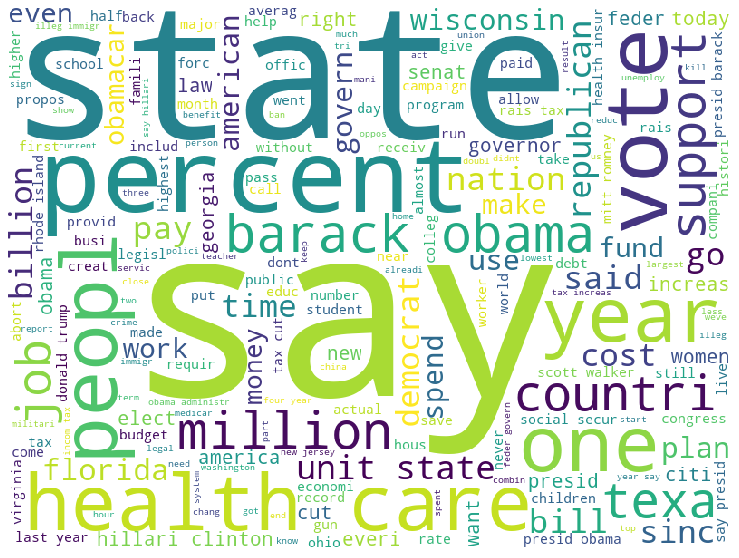

In [16]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(train_news['clean']))

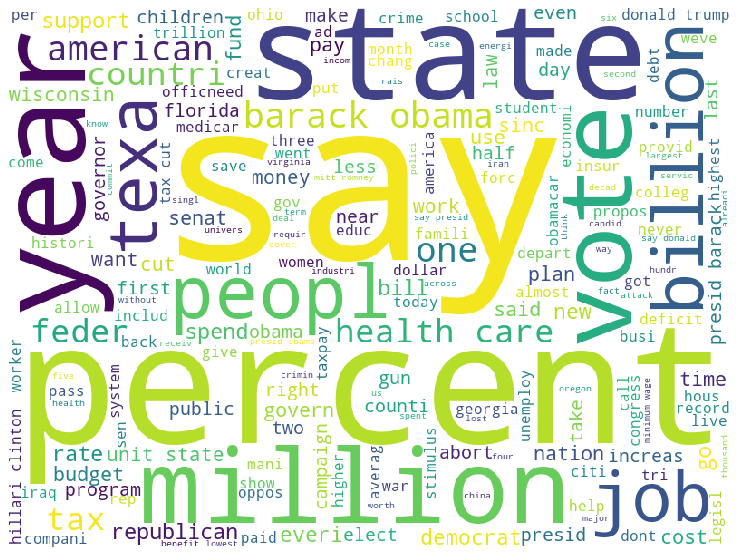

In [17]:
cloud(' '.join(test_news['clean']))

#### Observation from visulaization: 
- The large words are the words that are frequently appeared in the text/corpus

# Data Enrichment

#### SenticNet:  

In [18]:
from sklearn.preprocessing import scale

sentic_net = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Amrutha/Controversy_Speaker_Factors/Datasets/senticnet5.txt', sep="\t+", header=None, usecols=[0,1,2], names = ["Token", "Polarity", "Intensity"])
sentic_net = sentic_net[~sentic_net['Token'].str.contains('|'.join('_'),na=False)]
sentic_net = sentic_net.reset_index(drop=True)
print("Senticnet Vocab Size: ",len(sentic_net))
print(sentic_net.head(10))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


Senticnet Vocab Size:  39891
         Token  Polarity  Intensity
0      abandon  negative      -0.84
1    abandoned  negative      -0.85
2  abandonment  negative      -0.82
3        abase  negative      -0.90
4    abasement  negative      -0.90
5        abash  negative      -0.77
6      abashed  negative      -0.92
7    abashment  negative      -0.76
8       abasia  negative      -0.67
9        abate  negative      -0.86


In [19]:
senti = (nltk.word_tokenize(train_news['clean'][0]))
print("\n Polarity of word - list : ", (sentic_net.loc[sentic_net.Token == senti[2]]).Polarity.any())
print("\n Intensity of word - list : ", float( (sentic_net.loc[sentic_net.Token == senti[2]]).Intensity ))


 Polarity of word - list :  positive

 Intensity of word - list :  0.11599999999999999


> A basic task in sentiment analysis is classifying the polarity of a given text at the document, sentence, or feature/aspect level—whether the expressed opinion in a document, a sentence or an entity feature/aspect is positive, negative, or neutral.

In [0]:
senti_word_vector = []
def create_sentiment_vector_of_sentence(sentence):
    sentence_sentiment_vector=np.array([])    
    pol_score=[]
    intensity = []
    
    for word in sentence:        
        token_lower = word.lower()
        lemma_token = nltk.WordNetLemmatizer().lemmatize(token_lower)        
        if token_lower is 'not':
            pol_score =  np.append(pol_score, -1)
            intensity =  np.append(intensity, -1)
            
        elif lemma_token in sentic_net.Token.values:
            sentic_net_object = sentic_net.loc[sentic_net.Token == lemma_token]
            polarity = -1 if sentic_net_object.Polarity.any()  == 'negative' else 1
            pol_score = np.append(pol_score, polarity)
            intensity = np.append(intensity, float(sentic_net_object.Intensity))

        else:
            pol_score =  np.append(pol_score, 0)
            intensity =  np.append(intensity, 0)
    pol_score = float(sum(pol_score))/len(pol_score)
    senti_word_vector.append(intensity)
    intensity = float(sum(intensity))/len(intensity)
    
    sentence_sentiment_vector = np.append(sentence_sentiment_vector,[pol_score, intensity])
    return sentence_sentiment_vector

In [21]:
import nltk
nltk.download('wordnet')
sentiment_polarity = [] #vocab_scale,  sentic_net_polarity and intensity
sentiment_score = []
for index, row in train_news.iterrows():
    sentence = nltk.word_tokenize(row['clean'])
    sentiV = create_sentiment_vector_of_sentence(sentence)
    polarity = 1 if sentiV[0] > 0 else 0
    sentiment_polarity.append(polarity)
    sentiment_score.append(sentiV[1])

print("score: ", sentiment_score) # values will be between -1 and 1
print("polarity: ", sentiment_polarity) # 1 for positive and 0 for negative 

print(senti_word_vector)
# Add as a column to the dataset 
train_news['senti_score'] = sentiment_score
train_news['senti_polarity'] = sentiment_polarity

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
score:  [0.08959999999999999, -0.010785714285714287, 0.01575000000000001, 0.2501, 0.0252, -0.023666666666666666, 0.16866666666666666, 0.022466666666666656, 0.119, 0.12625, 0.25825, 0.165, 0.02800000000000001, 0.4383333333333333, 0.201375, 0.2508235294117647, 0.02278571428571429, 0.3511538461538462, 0.10391666666666667, -0.0004285714285714131, 0.1358181818181818, 0.317625, -0.05449999999999997, 0.37333333333333335, 0.361, 0.025750000000000002, -0.09066666666666667, 0.11646153846153846, 0.008571428571428572, 0.1648, 0.064, 0.12990000000000004, -0.055500000000000015, 0.1976, 0.47500000000000003, 0.26257142857142857, -0.059555555555555556, 0.24771428571428566, 0.16366666666666665, -0.2416923076923077, 0.08030769230769229, -0.15125, -0.0669090909090909, 0.07194444444444444, -0.061615384615384614, 0.3764444444444444, 0.0, -0.07200000000000001, 0.2136153846153846, 0.1044444444444

In [0]:
train_news['senti_word_vector'] =senti_word_vector

In [0]:
train_news.head(5)

In [0]:
sentiment_polarity = [] #vocab_scale,  sentic_net_polarity and intensity
sentiment_score = []
senti_word_vector = []

for index, row in test_news.iterrows():
    sentence = nltk.word_tokenize(row['clean'])
    sentiV = create_sentiment_vector_of_sentence(sentence)
    polarity = 1 if sentiV[0] > 0 else 0
    sentiment_polarity.append(polarity)
    sentiment_score.append(sentiV[1])

# Add as a column to the dataset 
test_news['senti_score'] = sentiment_score
test_news['senti_polarity'] = sentiment_polarity
test_news['senti_word_vector'] =senti_word_vector

In [0]:
test_news.head(5)

### Bag of Words 

> Bag of Words is simply the matrix that counts how many each word appears in documents (disregard grammar and word order). In order to do that, we use "CountVectorizer" method in sklearn library. 


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [0]:
# As mentioned many times, the matrix is going to be huge 
# so it would be a good idea to use Pipeline for encapsulating and avoiding a data leakage.
from sklearn.pipeline import Pipeline
pipe = Pipeline( [('vect', vectorizer)] )

In [0]:
# Complete form of bag of word for machine learning input. We will be using this for machine learning algorithms.
train_bw = pipe.fit_transform(train_news['clean'])

# We only call transform not fit_transform due to the risk of overfitting.
test_bw = pipe.transform(test_news['clean'])
print('train dim:', train_bw.shape, 'test dim:', test_bw.shape)

In [0]:
# Get the name fo the features
countV_features = vectorizer.get_feature_names()
print(countV_features[:25])

In [0]:
# Instead of 1 and 0 representation, create the dataframe to see how many times each word appears (just sum of 1 of each row)

train_sum = pd.DataFrame(np.sum(train_bw, axis=0), columns = countV_features)
train_sum.head()

### Classifier Modeling using CountVectorizer 

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

##### Classifier using Naives Bayes regression

In [0]:
nb_pipeline = Pipeline([
        ('vector', vectorizer),
        ('mname',MultinomialNB())])

nb_pipeline.fit(train_news['clean'],train_news['senti_polarity'])
predicted_nb = nb_pipeline.predict(test_news['clean'])
np.mean(predicted_nb == test_news['senti_polarity'])

#### Classifier using Logistic regression

In [0]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
logR_pipeline = Pipeline([
        ('vector',vectorizer),
        ('mname',LogisticRegression())
        ])
logR_pipeline.fit(train_news['clean'],train_news['senti_polarity'])
predicted_LogR = logR_pipeline.predict(test_news['clean'])
np.mean(predicted_LogR == test_news['senti_polarity'])

##### Classifier using Linear SVM Classifier

In [0]:

svm_pipeline = Pipeline([
        ('vector',vectorizer),
        ('mname',svm.LinearSVC())
        ])

svm_pipeline.fit(train_news['clean'],train_news['senti_polarity'])
predicted_svm = svm_pipeline.predict(test_news['clean'])
np.mean(predicted_svm == test_news['senti_polarity'])

#####  Classifier using SVM Stochastic Gradient Descent on hinge loss

In [0]:
warnings.filterwarnings("ignore",category=DeprecationWarning)
sgd_pipeline = Pipeline([
        ('vector',vectorizer),
        ('mname',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
        ])

sgd_pipeline.fit(train_news['clean'],train_news['senti_polarity'])
predicted_sgd = sgd_pipeline.predict(test_news['clean'])
np.mean(predicted_sgd == test_news['senti_polarity'])

##### Classifier using RandomForestClassifier

In [0]:
#random forest
random_forest = Pipeline([
        ('vector', vectorizer),
        ('mname',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest.fit(train_news['clean'],train_news['senti_polarity'])
predicted_rf = random_forest.predict(test_news['clean'])
np.mean(predicted_rf == test_news['senti_polarity'])

### Models performance Comparison 

In [0]:
#User defined functon for K-Fold cross validatoin
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5, random_state=None, shuffle=False)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(train_news):
        train_text = train_news.iloc[train_ind]['clean'] 
        train_y = train_news.iloc[train_ind]['senti_polarity']
    
        test_text = train_news.iloc[test_ind]['clean']
        test_y = train_news.iloc[test_ind]['senti_polarity']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    return (print("Classifier Name: ", classifier.named_steps['mname']),
    print('Total statements classified:', len(train_news)),
    print('Accuracy:', sum(scores)/len(scores)),
    print('Confusion matrix:'),
    print(confusion),
    print("\n\n==========================================================\n"))

In [0]:
#K-fold cross validation for all classifiers
build_confusion_matrix(nb_pipeline)
build_confusion_matrix(logR_pipeline)
build_confusion_matrix(svm_pipeline)
build_confusion_matrix(sgd_pipeline)
build_confusion_matrix(random_forest)

### Result:

- LinearSVC provides the maximum score among all the 5 models.
- The sentiment analysis with CounterVectorizer seems to be 95% accurate. 

#### NLTK Sentiment Intensity Analyzer using VADER **(Valence Aware Dictionary and sEntiment Reasoner)**

In [0]:
import nltk.sentiment
nltk.download('vader_lexicon')
warnings.filterwarnings("ignore",category=UserWarning)
senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = senti.polarity_scores(sentence)
    print("{:-<40} \n{}".format(sentence, str(snt)))
    
print_sentiment_scores(train_news['clean'][0])

In [0]:
def get_vader_polarity(snt):
    if not snt:
        return None
    elif snt['neg'] > snt['pos'] and snt['neg'] > snt['neu']:
        return -1
    elif snt['pos'] > snt['neg'] and snt['pos'] > snt['neu']:
        return 1
    else:
        return 0

In [0]:
#Function to determine if a text is negative(-1) or postive (1) or neutral (0)
def get_polarity_type(sentence):
    sentimentVector = []
    snt = senti.polarity_scores(sentence)
    sentimentVector.append(get_vader_polarity(snt))
    sentimentVector.append(snt['neg'])
    sentimentVector.append(snt['neu'])
    sentimentVector.append(snt['pos'])
    sentimentVector.append(snt['compound'])
    
    print(sentimentVector)
    return sentimentVector

In [0]:
sentiment = []
vader_pol = []
for row in train_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    
train_news['sentiment_vector'] = sentiment
train_news['vader_polarity'] = vader_pol

In [0]:
train_news.head(5)

In [0]:
sentiment = []
vader_pol = []
for row in test_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    
    
test_news['sentiment_vector'] = sentiment
test_news['vader_polarity'] = vader_pol

In [0]:
test_news.head(5)

### TF-IDF & N-gram

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfV = TfidfVectorizer(ngram_range = (1,3), sublinear_tf = True)

In [0]:
train_tfidf = tfidfV.fit_transform(train_news['clean'])
print('Training dim:', train_tfidf.shape)
print(train_tfidf.A[:10])

test_tfidf = tfidfV.fit_transform(test_news['clean'])
print('Test dim:', test_tfidf.shape)
print(test_tfidf.A[:10])

In [0]:
tfidfV.vocabulary_

In [0]:
tfidf_feature = tfidfV.get_feature_names()
print(tfidf_feature[:25])

# Factor: State Info

###  Doc2vec and Classification Algorithm

In [0]:
import multiprocessing
cores = multiprocessing.cpu_count()
import re
import spacy 
!pip install textacy
from textacy import preprocessing
from textacy import preprocess
from textacy import constants
from textacy.vsm import Vectorizer
from gensim.models import Doc2Vec
# !pip install 'pandas==0.24.0' --force-reinstall
!pip install 'tqdm>=4.33.0' --force-reinstall
import tqdm
from tqdm import tqdm
# tqdm.pandas(desc='progress-bar')
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data1 = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Amrutha/Controversy_Speaker_Factors/Datasets/train.csv', error_bad_lines=False, sep=",", names = ['ID','Label','Statement','Subject','Speaker','Speakers Job Title','State Info','Party Affiliation','Barely True Counts','False Counts',' Half True Counts','Mostly True Counts','Pants On Fire Counts','The Context'])

In [0]:
data1 = data1[['Statement','State Info']]
data1 = data1[pd.notnull(data1['Statement'])]
data1 = data1[pd.notnull(data1['State Info'])]
data1.head(10)

In [0]:
data1.isnull().sum()

In [0]:
count_affiliation = data1['State Info'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(count_affiliation.index, count_affiliation.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('State Info', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [0]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text

In [0]:
data1['Statement'] = data1['Statement'].apply(cleanText)

In [0]:
data1['Statement'][1]
data1.index = range(8032)

In [0]:
from gensim.models import doc2vec

def label_sentences(corpus, label_type):
    
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

In [0]:
from gensim.models import doc2vec

def label_sentences(corpus, label_type):
    
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

In [0]:
data1.rename(columns = {'State Info':'StateInfo'}, inplace = True)

In [0]:
X_train_fact1, X_test_fact1, y_train_fact1, y_test_fact1 = train_test_split(data1.Statement, data1.StateInfo, random_state=0, test_size=0.3)
X_train_fact1 = label_sentences(X_train_fact1, 'Train')
X_test_fact1 = label_sentences(X_test_fact1, 'Test')
all_data = X_train_fact1 + X_test_fact1

In [0]:
all_data[:2]

In [0]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

In [0]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

In [0]:
import numpy as np

def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [0]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train_fact1), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test_fact1), 300, 'Test')

In [0]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='multinomial', solver = 'lbfgs')
logreg.fit(train_vectors_dbow, y_train_fact1)

In [0]:
logreg.score(test_vectors_dbow, y_test_fact1)

In [0]:
model_dbow.save('d2v_model_dbow.doc2vec')

In [0]:
model_dm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dm.build_vocab([x for x in tqdm(all_data)])

In [0]:
%%time
for epoch in range(30):
    model_dm.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dm.alpha -= 0.002
    model_dm.min_alpha = model_dm.alpha

In [0]:
train_vectors_dm = get_vectors(model_dm, len(X_train_fact1), 300, 'Train')
test_vectors_dm = get_vectors(model_dm, len(X_test_fact1), 300, 'Test')

In [0]:
logreg.fit(train_vectors_dm, y_train_fact1)

In [0]:
logreg.score(test_vectors_dm, y_test_fact1)

In [0]:
model_dm.save('d2v_model_dm.doc2vec')

In [0]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [0]:
def get_concat_vectors(model1,model2, corpus_size, vectors_size, vectors_type):
   vectors = np.zeros((corpus_size, vectors_size))
   for i in range(0, corpus_size):
       prefix = vectors_type + '_' + str(i)
       vectors[i] = np.append(model1.docvecs[prefix],model2.docvecs[prefix])
   return vectors
train_vecs_dbow_dm = get_concat_vectors(model_dbow,model_dm, len(X_train_fact1), 600, 'Train')
test_vecs_dbow_dm = get_concat_vectors(model_dbow,model_dm, len(X_test_fact1), 600, 'Test')

In [0]:
%%time
logreg = LogisticRegression()
logreg.fit(train_vecs_dbow_dm, y_train_fact1)

In [0]:
logreg.score(test_vecs_dbow_dm, y_test_fact1)

### Classification Algo: Naive Bayes Algorithm

In [0]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_vectors_dm,y_train_fact1)

## Predicting the test set results

In [0]:
y_predNaiveBayes = classifier.predict(test_vectors_dm)
print(y_predNaiveBayes)
#print(y_test)
#compare y_pred and y_test and see they must have same value, few will not , u can get the details in confusion matrix

## Making the confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix
#y_test because correct target values, y_pred= estimated target as returned by classifier 
cm = confusion_matrix(y_test_fact1,y_predNaiveBayes)
print(cm)

### Lets calculate Acurracy

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_fact1,y_predNaiveBayes)

### The accuracy is 0.08 for the naïve Bayes.

###  Random Forest: Classification Algorithm

In [0]:
#split data into train and test sets
from sklearn.model_selection import train_test_split

In [0]:
# Implementing Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RandomForest = RandomForestClassifier(criterion='gini',n_jobs=3, min_samples_leaf=20, n_estimators=25, max_depth=15)
RandomForest.fit(train_vecs_dbow_dm, y_train_fact1)
Y_Pred_RandomForest = RandomForest.predict(test_vecs_dbow_dm)

###  Making the confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix
#y_test because correct target values, y_pred= estimated target as returned by classifier 
cm = confusion_matrix(y_test_fact1,Y_Pred_RandomForest)
print(cm)

### Lets calculate Acurracy

In [0]:
ac = accuracy_score(y_test_fact1,Y_Pred_RandomForest)*100
print('RandomForest accuracy')
ac

# Factor "Speaker"

### Doc2vec and Classification Algorithm 

In [0]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data2 = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Amrutha/Controversy_Speaker_Factors/Datasets/train.csv', error_bad_lines=False, sep=",", names = ['ID','Label','Statement','Subject','Speaker','Speakers Job Title','State Info','Party Affiliation','Barely True Counts','False Counts',' Half True Counts','Mostly True Counts','Pants On Fire Counts','The Context'])
data2 = data2[['Statement','Speaker']]
data2 = data2[pd.notnull(data2['Statement'])]
data2 = data2[pd.notnull(data2['Speaker'])]
data2.head(10)

In [0]:
data2.isnull().sum()

In [0]:
count_affiliation = data2['Speaker'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(count_affiliation.index, count_affiliation.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Speaker', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [0]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text

In [0]:
data2['Statement'] = data1['Statement'].apply(cleanText)

In [0]:
data2['Statement'][1]
#10238
data2.index = range(10238)

In [0]:
from gensim.models import doc2vec

def label_sentences(corpus, label_type):
    
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

In [0]:
data2.rename(columns = {'State Info':'StateInfo'}, inplace = True)

In [0]:
X_train_fact2, X_test_fact2, y_train_fact2, y_test_fact2 = train_test_split(data1.Statement, data1.StateInfo, random_state=0, test_size=0.3)
X_train_fact2 = label_sentences(X_train_fact2, 'Train')
X_test_fact2 = label_sentences(X_test_fact2, 'Test')
all_data = X_train_fact2 + X_test_fact2

In [0]:
all_data[:2]

In [0]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

In [0]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

In [0]:
import numpy as np

def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [0]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train_fact2), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test_fact2), 300, 'Test')

In [0]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='multinomial', solver = 'lbfgs')
logreg.fit(train_vectors_dbow, y_train_fact2)

In [0]:
logreg.score(test_vectors_dbow, y_test_fact2)

In [0]:
model_dbow.save('d2v_model_dbow.doc2vec')

In [0]:
model_dm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dm.build_vocab([x for x in tqdm(all_data)])

In [0]:
%%time
for epoch in range(30):
    model_dm.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dm.alpha -= 0.002
    model_dm.min_alpha = model_dm.alpha

In [0]:
train_vectors_dm = get_vectors(model_dm, len(X_train_fact2), 300, 'Train')
test_vectors_dm = get_vectors(model_dm, len(X_test_fact2), 300, 'Test')

In [0]:
logreg.fit(train_vectors_dm, y_train_fact2)

In [0]:
logreg.score(test_vectors_dm, y_test_fact2)

In [0]:
model_dm.save('d2v_model_dm.doc2vec')

In [0]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [0]:
def get_concat_vectors(model1,model2, corpus_size, vectors_size, vectors_type):
   vectors = np.zeros((corpus_size, vectors_size))
   for i in range(0, corpus_size):
       prefix = vectors_type + '_' + str(i)
       vectors[i] = np.append(model1.docvecs[prefix],model2.docvecs[prefix])
   return vectors
train_vecs_dbow_dm = get_concat_vectors(model_dbow,model_dm, len(X_train_fact2), 600, 'Train')
test_vecs_dbow_dm = get_concat_vectors(model_dbow,model_dm, len(X_test_fact2), 600, 'Test')

In [0]:
%%time
logreg = LogisticRegression()
logreg.fit(train_vecs_dbow_dm, y_train_fact2)

In [0]:
logreg.score(test_vecs_dbow_dm, y_test_fact2)

### Classification Algo: Naive Bayes Algorithm

In [0]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_vectors_dm,y_train_fact2)

## Predicting the test set results

In [0]:
y_predNaiveBayes = classifier.predict(test_vectors_dm)
print(y_predNaiveBayes)
#print(y_test)
#compare y_pred and y_test and see they must have same value, few will not , u can get the details in confusion matrix

### Making the confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix
#y_test because correct target values, y_pred= estimated target as returned by classifier 
cm = confusion_matrix(y_test_fact2,y_predNaiveBayes)
print(cm)

#### Lets calculate Acurracy

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_fact2,y_predNaiveBayes)

### The accuracy of 0.09 of the naïve Bayes is not that good as it is the text.

## Random Forest: Classification Algorithm

In [0]:
#split data into train and test sets
from sklearn.model_selection import train_test_split

In [0]:
# Implementing Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RandomForest = RandomForestClassifier(criterion='gini',n_jobs=3, min_samples_leaf=20, n_estimators=25, max_depth=15)
RandomForest.fit(train_vecs_dbow_dm, y_train_fact2)
Y_Pred_RandomForest = RandomForest.predict(test_vecs_dbow_dm)

### Making the confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix
#y_test because correct target values, y_pred= estimated target as returned by classifier 
cm = confusion_matrix(y_test_fact2,Y_Pred_RandomForest)
print(cm)

### Lets calculate Acurracy

In [0]:
ac = accuracy_score(y_test_fact2,Y_Pred_RandomForest)*100
print('RandomForest accuracy')
ac

### Classifier Modeling using TF-IDF Vectorizer 

#####  Classifier using Naives Bayes regression

In [0]:
nb_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',MultinomialNB())])

nb_pipeline_ngram.fit(train_news['clean'], train_news['vader_polarity'])
predicted_nb = nb_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_nb == test_news['vader_polarity'])

####  Classifier using Logistic regression

In [0]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
logR_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',LogisticRegression())
        ])
logR_pipeline_ngram.fit(train_news['clean'],train_news['vader_polarity'])
predicted_LogR = logR_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_LogR == test_news['vader_polarity'])

##### Classifier using Linear SVM Classifier

In [0]:
svm_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',svm.LinearSVC())
        ])

svm_pipeline_ngram.fit(train_news['clean'],train_news['vader_polarity'])
predicted_svm = svm_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_svm == test_news['vader_polarity'])

##### Classifier using SVM Stochastic Gradient Descent on hinge loss

In [0]:
warnings.filterwarnings("ignore",category=DeprecationWarning)
sgd_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
        ])

sgd_pipeline_ngram.fit(train_news['clean'],train_news['vader_polarity'])
predicted_sgd = sgd_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_sgd == test_news['vader_polarity'])

##### Building Classifier using RandomForestClassifier

In [0]:
#random forest
random_forest_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest_ngram.fit(train_news['clean'],train_news['vader_polarity'])
predicted_rf = random_forest_ngram.predict(test_news['clean'])
np.mean(predicted_rf == test_news['vader_polarity'])

### Models performance Comparison 

In [0]:
#User defined functon for K-Fold cross validatoin
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5, random_state=None, shuffle=False)
    scores = []
    confusion = np.array([[0,0,0],[0,0,0],[0,0,0]])

    for train_ind, test_ind in k_fold.split(train_news):
        train_text = train_news.iloc[train_ind]['clean'] 
        train_y = train_news.iloc[train_ind]['vader_polarity']
    
        test_text = train_news.iloc[test_ind]['clean']
        test_y = train_news.iloc[test_ind]['vader_polarity']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions, average='micro')
        scores.append(score)
    
    return (print("Classifier Name: ", classifier.named_steps['mname']),
    print('Total statements classified:', len(train_news)),
    print('Accuracy:', sum(scores)/len(scores)),
    print('Confusion matrix:'),
    print(confusion),
    print("\n\n==========================================================\n"))

In [0]:
#K-fold cross validation for all classifiers
build_confusion_matrix(nb_pipeline_ngram)
build_confusion_matrix(logR_pipeline_ngram)
build_confusion_matrix(svm_pipeline_ngram)
build_confusion_matrix(sgd_pipeline_ngram)
build_confusion_matrix(random_forest_ngram)

### Result:

- LinearSVC has the maximum score among all the 5 models.
- The sentiment analysis with TF-IDF Vectorizer seems to be 97% accurate. 

### Word2Vec 

In [0]:
from gensim.models import word2vec
num_features = 400
min_count = 40
num_processor = 4
context = 10
downsampling = 0.001

In [0]:
train_words = []
test_words = [] 

# Append all the cleaned words
for news in train_news['clean']:
    train_words.append(news.split())
# print(train_words)   

# Append all the cleaned words
for news in test_news['clean']:
    test_words.append(news.split())
# print(test_words)   

In [0]:
train_w2v = word2vec.Word2Vec(train_words, workers = num_processor, 
                         size = num_features, min_count = min_count,
                         window = context, sample = downsampling)

In [0]:
# Unload unneccessary memory once the learning process is done.
train_w2v.init_sims(replace = True)

In [0]:
train_w2v.most_similar("trump")

#### Visualization

In [0]:
# Import libraries
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore",category=RuntimeWarning)

# List of vocabulary.

vocab = list(train_w2v.wv.vocab)

# index vector values by corresponding vocab list

X = train_w2v[vocab]

print("Total Number of Vocab:", len(X))
print()
print(X[0][:10])

# Visualize only 100 words.

tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X[:100,:])


In [0]:
df = pd.DataFrame(X_tsne, index = vocab[:100], columns = ['X','Y'])
df.head()

In [0]:
fig = plt.figure()
fig.set_size_inches(30,20)

ax = fig.add_subplot(1,1,1)
ax.scatter(df['X'], df['Y'])

# Put the label on each point.
for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize = 20)
plt.show()

#### Observation: 

Compared to the previous methods' (CountVectorizer, TF-IDF) WordCloud, it appears more informative and based on the above plot, we can capture the general shape of the news. 
  

### Vector Averaging 

In [0]:
'''
Illustration example:

'I' = [0.1, 0.2, ...]
'have' = [0.2, 0.3, ...]
'a car' = [0.1, 0.2, ...]
'I have a car' = [0.1 + 0.2 + 0.1, 0.2 + 0.3 + 0.2,  ...]

'''

def makeFeatureVec(news, train_w2v, num_features):
    
    featureVec = np.zeros((num_features,), dtype = "float32")
    
    # Unique word set
    word_index = set(train_w2v.wv.index2word)
    
    # For division we need to count the number of words
    nword = 0
    
    # Iterate words in a review and if the word is in the unique wordset, add the vector values for each word.
    for word in news:
        if word in word_index:
            nword += 1
            featureVec = np.add(featureVec, train_w2v[word])
    
    # Divide the sum of vector values by total number of word in a review.
    featureVec = np.divide(featureVec, nword)        
    
    return featureVec

In [0]:
'''
return matrix:

            'V1'    'V2'    'V3'     'V4'
news 1    0.1      0.2     0.1     0.5
news 2    0.5      0.4     0.05    0.05

'''

def getAvgFeatureVec(clean_news, train_w2v, num_features):
    
    # Keep track of the sequence of each news, create the number "th" variable.
    news_th = 0
    
    # Row: number of total news, Column: number of vector spaces (num_features = 250 we set this in Word2Vec step).
    newsFeatureVecs = np.zeros((len(clean_news), num_features), dtype = "float32")
    
    # Iterate over each news and add the result of makeFeatureVec.
    for news in clean_news:
        newsFeatureVecs[int(news_th)] = makeFeatureVec(news, train_w2v, num_features)
        
        # Once the vector values are added, increase the one for the news_th variable.
        news_th += 1
    
    return newsFeatureVecs


In [0]:
# Apply "getAvgFeatureVec" function.
trainDataAvg = getAvgFeatureVec(train_news['clean'], train_w2v, num_features)
testDataAvg = getAvgFeatureVec(test_news['clean'],train_w2v, num_features)
print("Train Dimension (avg):",trainDataAvg.shape,",", "Test Dimension (avg):", testDataAvg.shape)

In [0]:
print(trainDataAvg[0:]) #for the first news in training data
print("\n\n", trainDataAvg[~np.isnan(trainDataAvg)][0:])
# print(trainDataAvg[: , ~np.isnan(trainDataAvg).any(axis=0)][0:])

#### Observation from Word2Vec: 
    
The Word2Vec provides vectorization for each word. Which causes dimentional issues with the 'senti_word_vector'  column of each article.

**Solution:** Doc2Vec 

### Doc2Vec

**doc2vec model** 
**Distributed Bag of Words (DBOW)**

In [0]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
cores = multiprocessing.cpu_count()
from nltk.tokenize import word_tokenize
# from tqdm import tqdm
# tqdm.pandas(desc="progress-bar")

In [0]:
train_news.shape

In [0]:
train_news.index = range(10240)
train_news['clean'].apply(lambda x: len(x.split(' '))).sum()

#### Tagged documents

In [0]:
def tag_docs(docs, col):
    tagged = docs.apply(lambda r: TaggedDocument(words=r[col].split(" "), tags=[r['senti_polarity']]), axis=1)
    return tagged

In [0]:
train_tagged = train_news.apply(lambda r: TaggedDocument(words=r['clean'].split(" "), tags=[r['senti_polarity']]), axis=1)

In [0]:
sents = train_tagged.values
print("Train Tags: ", sents[20])

In [0]:
warnings.filterwarnings("ignore",category=UserWarning)
model = Doc2Vec(sents, size=1, window=100, iter=20, dm=1)

print(model.docvecs.count)
# model.build_vocab([x for x in tqdm(train_tagged)])

In [0]:
def train_doc2vec_model(tagged_docs, window, size):
    sents = tagged_docs.values
    doc2vec_model = Doc2Vec(sents, size=size, window=window, iter=20, dm=1)
    return doc2vec_model

#### Building the final vector feature for the classifier:

In [0]:
def vec_for_learning(doc2vec_model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

### Classifier Modeling using Doc2Vec

In [0]:
# Training and Test data with Doc2Vec 
# The vector has two sentiments values - positive and negative 
train_tagged = tag_docs(train_news, 'clean')
test_tagged = tag_docs(test_news, 'clean')
model = train_doc2vec_model(train_tagged, 100, 1)

y_train, X_train = vec_for_learning(model, train_tagged)
y_test, X_test = vec_for_learning(model, test_tagged)

In [0]:
print("\n X train dim: ", len(X_train))
print("\n y train dim: ", len(y_train))
print("\n X test dim: ", len(X_test))
print("\n y test dim:", len(y_test))

#### Classifier using Logistic regression

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy : ", f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

##### Classifier using Linear SVM Classifier

In [0]:
svm_lin = svm.LinearSVC()
svm_lin.fit(X_train, y_train)
y_pred = svm_lin.predict(X_test)
print("Accuracy : ", f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

##### Classifier using RandomForestClassifier

In [0]:
#random forest
r_forest = RandomForestClassifier(n_estimators=200,n_jobs=3)
r_forest.fit(X_train, y_train)
y_pred = r_forest.predict(X_test)
print("Accuracy : ", f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

##### Classifier using SVM Stochastic Gradient Descent on loss

In [0]:
sgb = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3)
sgb.fit(X_train, y_train)
y_pred = sgb.predict(X_test)
print("Accuracy : ", f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

In [0]:
print(classification_report(y_test,y_pred))

In [0]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy %s' % accuracy_score(y_pred, y_test))
confusion_matrix(y_test,y_pred)

### Final analysis and result:


- Using **Logistic regression**
Accuracy :  0.9110442629995702


- Using **Linear SVM Classifier**
Accuracy :  0.9110442629995702


- Using **RandomForestClassifier**
Accuracy :  0.8376470588235295


- Using **SVM Stochastic Gradient Descent** 
Accuracy :  0.9110442629995702

- Using **Linear SVC** Accuracy: 0.8366219415943172

#### Models like Linear SVM and LogisticRegression provides the maximum score as 91% as compared to RandomForestClassifier and SVM Stochastic Gradient Descent.

The final collective model (polynomial equation) can be used to detect the fake news. Since we perceive truethfulness as a relative concept, this factor can not only be used to detect the fake news, but also to determine the level of truethfulness of any news. 